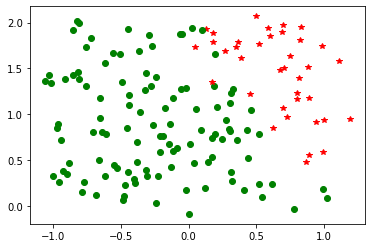

In [10]:
# 逻辑回归（判断‘是’与‘否’的关系）
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
# 声明数据和标签
data=[]
label=[]
np.random.seed(0)
# 随机产生训练集
for i in range(150):
    x1=np.random.uniform(-1,1)
    x2=np.random.uniform(0,2)
    if x1*2+x2<=2:
        data.append([np.random.normal(x1,0.1),np.random.normal(x2,0.1)])
        label.append(0)
        plt.plot(data[i][0],data[i][1],'go')
    else:
        data.append([np.random.normal(x1,0.1),np.random.normal(x2,0.1)])
        label.append(1)
        plt.plot(data[i][0],data[i][1],'r*')
# 绘制图像
data=np.hstack(data).reshape(-1,2)
label=np.hstack(label).reshape(-1,1)
plt.show()

逻辑回归使用sigmoid函数，损失函数为预测值与真实值的切合程度，对其求平均值。

In [3]:
# 定义变量
x=tf.placeholder(tf.float32,shape=(None,2))
y_=tf.placeholder(tf.float32,shape=(None,1))
W=tf.Variable(tf.zeros([2,1]))
b=tf.Variable(tf.zeros([1]))
# 逻辑回归模型
y=tf.sigmoid(tf.matmul(x,W)+b)
# 计算损失
sample_size=len(data)
cross_entropy=-tf.reduce_sum(y_*tf.log(y)+(1-y_)*tf.log(1-y))/sample_size
# 训练模型
learning_rate=0.01
cost_prev=0
train_step=tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)
init=tf.global_variables_initializer()

In [5]:
# 进行训练数据
with tf.Session() as sess:
    sess.run(init)
    for i in range(40001):
        sess.run(train_step,feed_dict={x:data,y_:label})
        train_cost=sess.run(cross_entropy,feed_dict={x:data,y_:label})
        if np.abs(cost_prev-train_cost) < 1e-6:
            break;
        cost_prev=train_cost
        if i% 2000==0:
            print(i,sess.run([W,b,cross_entropy],{x:data,y_:label}))
    # 记录最终的w和b
    W_val=sess.run(W)
    b_val=sess.run(b)
    sess.close()


0 [array([[ 0.00174148],
       [-0.00151838]], dtype=float32), array([-0.00253333], dtype=float32), 0.6919739]
2000 [array([[1.8818088 ],
       [0.38590872]], dtype=float32), array([-1.4758188], dtype=float32), 0.32219347]
4000 [array([[2.6484437 ],
       [0.83563876]], dtype=float32), array([-2.2362044], dtype=float32), 0.25254238]
6000 [array([[3.1281621],
       [1.1744515]], dtype=float32), array([-2.8106453], dtype=float32), 0.21857311]
8000 [array([[3.4874675],
       [1.4471513]], dtype=float32), array([-3.274083], dtype=float32), 0.19758797]
10000 [array([[3.781873 ],
       [1.6744869]], dtype=float32), array([-3.663063], dtype=float32), 0.18307295]
12000 [array([[4.035457 ],
       [1.8688177]], dtype=float32), array([-3.998576], dtype=float32), 0.17232466]
14000 [array([[4.26054 ],
       [2.038229]], dtype=float32), array([-4.293884], dtype=float32), 0.16398671]
16000 [array([[4.46425  ],
       [2.1882827]], dtype=float32), array([-4.5579157], dtype=float32), 0.15729451

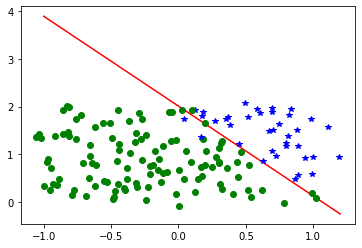

In [13]:
# 运行总结
w1=W_val[0][0]
w2=W_val[1][0]
k=-w1/w2
b=-b_val/w2
xx=np.linspace(-1,1.2,100)
yy=k*xx+b
plt.plot(xx,yy,'r-')
for i in range(150):
    if label[i]==0:
        plt.plot(data[i][0],data[i][1],"go")
    else:
        plt.plot(data[i][0],data[i][1],"b*")
plt.show()
